# SALES PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adv = pd.read_csv("advertising.csv")
adv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
adv.shape

(200, 4)

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

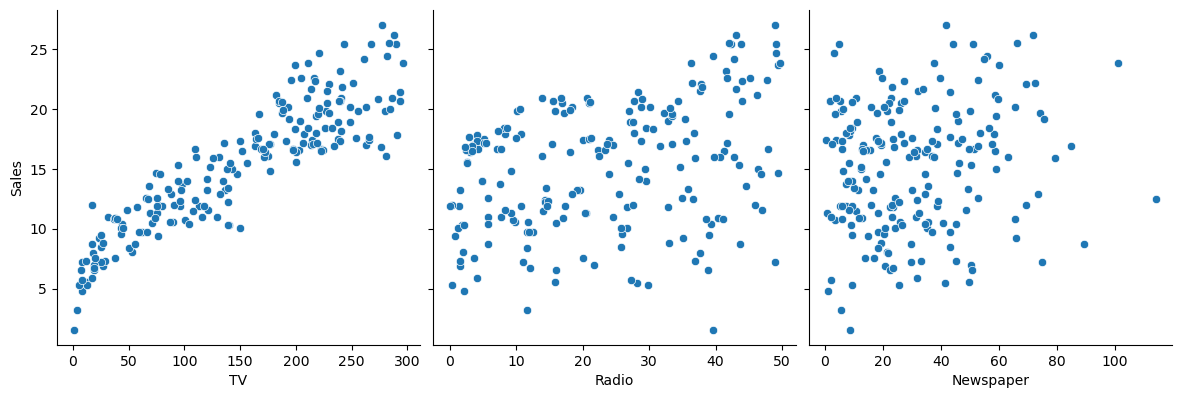

In [9]:
sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=4,aspect=1,kind='scatter')
plt.show()

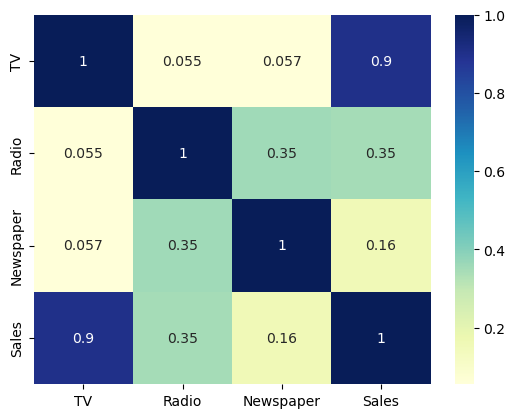

In [10]:
sns.heatmap(adv.corr(),cmap="YlGnBu",annot =True)
plt.show()

In [11]:
X = adv["TV"]
Y =adv["Sales"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,train_size =0.7,test_size =0.3,random_state =100)

In [13]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
import statsmodels.api as sm


In [17]:
X_train_sm =sm.add_constant(X_train)
lr =sm.OLS(Y_train,X_train).fit()
lr.params

TV    0.08833
dtype: float64

In [18]:
lr = sm.OLS(Y_train, X_train_sm).fit()

# Predict using the fitted model
Y_train_pred = lr.predict(X_train_sm)

# Residuals
res = Y_train - Y_train_pred

# Print model summary
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.52e-52
Time:                        13:55:36   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

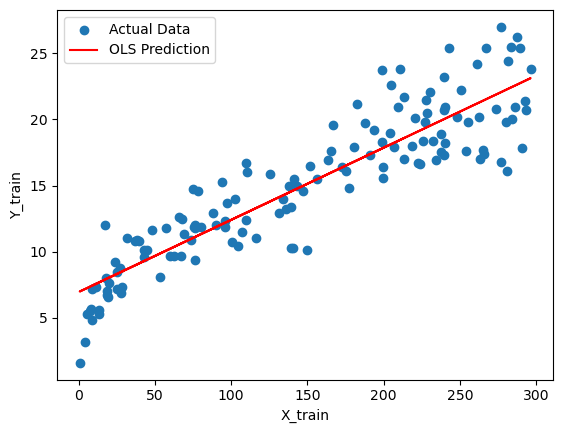

In [19]:
# Plot actual vs. predicted
plt.scatter(X_train, Y_train, label="Actual Data")
plt.plot(X_train, Y_train_pred, color="red", label="OLS Prediction")
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.legend()
plt.show()

In [20]:
Y_train_pred=lr.predict(X_train_sm)
res =(Y_train - Y_train_pred)

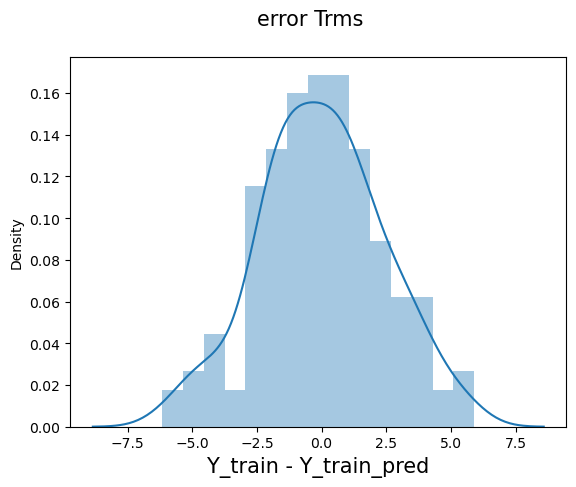

In [21]:
fig =plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('error Trms',fontsize=15)
plt.xlabel('Y_train - Y_train_pred',fontsize =15)
plt.show()

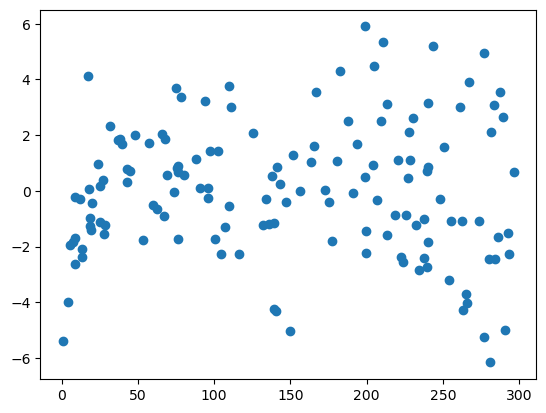

In [22]:
plt.scatter(X_train,res)#looking for patterns in the varibles
plt.show()


In [23]:
#prediction on the test set
X_test_sm =sm.add_constant (X_test)
Y_pred =lr.predict(X_test_sm)
Y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
print("mean_squared_error : ",np.sqrt(mean_squared_error (Y_test,Y_pred)))

mean_squared_error :  2.0192960089662337


In [26]:
r_squared =r2_score(Y_test,Y_pred)
print("r_squared: ",r_squared)

r_squared:  0.7921031601245656


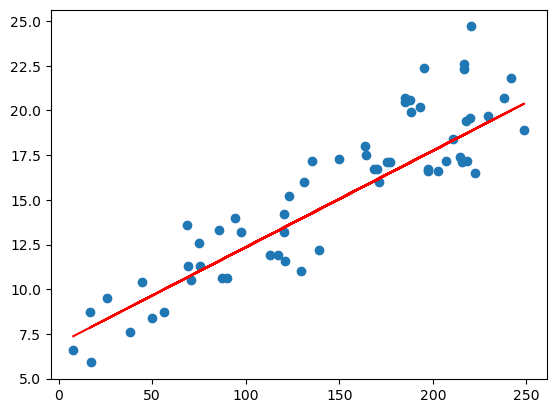

In [27]:
plt.scatter(X_test,Y_test)# visualizing the fit on the test
plt.plot(X_test,6.948+0.054*X_test,'r')
plt.show()

# linear Regression 

In [29]:
from sklearn.model_selection import train_test_split
X_train_lm , X_test_lm,Y_train_lm , Y_test_lm=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state =100)

In [30]:
X_train_lm.shape

(140,)

In [31]:
X_train_lm = X_train_lm.values.reshape(-1, 1)
X_test_lm = X_test_lm.values.reshape(-1, 1)


In [32]:
print(X_train_lm.shape)
print(Y_train_lm.shape)
print(X_test_lm.shape)
print(Y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [33]:

lm = LinearRegression()
lm.fit(X_train_lm,Y_train_lm)

LinearRegression()

In [34]:
print(lm.intercept_)

6.94868320000136


In [35]:
print(lm.coef_)

[0.05454575]


In [36]:
corrs=np.corrcoef(X_train,Y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [37]:
corrs[0,1]**2

0.8157933136480386

In [38]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
X_train_scaled =X_train.values.reshape(-1,1)
Y_train_scaled =Y_train.values.reshape(-1,1)

In [39]:
X_train_scaled.shape

(140, 1)

In [40]:
Y_train_scaled.shape

(140, 1)

In [41]:
#craeting scaler Object Using StandardScaler()
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train_scaled)
Y_train_scaled =scaler.fit_transform(Y_train_scaled)

In [42]:
print("mean for X_train_scaled :",np.mean(X_train_scaled))

mean for X_train_scaled : 2.5376526277146434e-17


In [43]:
print("Sd for X_train_scaled :",np.std(X_train_scaled))

Sd for X_train_scaled : 0.9999999999999999


In [97]:
print("mean for Y_train_scaled :",np.mean(Y_train_scaled))

mean for Y_train_scaled : -2.5376526277146434e-16


In [99]:
print("Sd for Y_train_scaled :",np.std(Y_train_scaled))

Sd for Y_train_scaled : 1.0


In [101]:
X_train_scaled =sm.add_constant(X_train_scaled)
lr_scaled =sm.OLS(Y_train_scaled,X_train_scaled).fit()

In [107]:
lr_scaled.params

array([-2.44596010e-16,  9.03212773e-01])

In [111]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.52e-52
Time:                        13:58:38   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.0